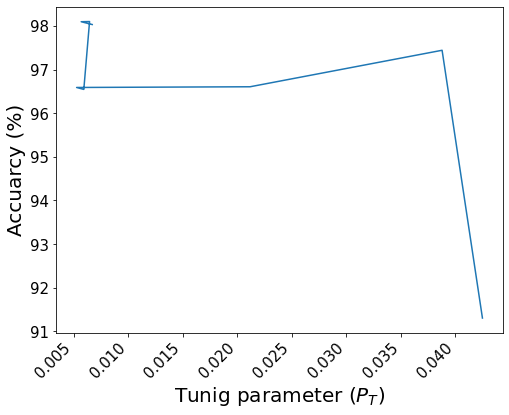

In [1]:
#Just for the graph
import matplotlib.pyplot as plt
import numpy as np

#Dos = 57747


# 16540

# #attacked 5675

# 3955 *.95 

# #Train = 25825
# #attacked 3955


an = [0.06694091677,
0.05682482587,
0.06451746683,
# 0.2842135866,
# 0.3382263023,
0.05924078277,
0.05264714259,
0.2116682164,
0.3877557574,
0.4247502115]

values = [
 98.03232323,
98.0969697,
98.1010101,
# 94.77171717,
# 83.78181818,
96.54545455,
96.58989899,
96.60606061,
97.44242424,
91.30505051,
]

an = np.array(an)
values = np.array(values)

plt.figure(figsize=(8, 6))
plt.plot(.1*an, values)
plt.xticks(rotation=45, ha ='right', fontsize = 20)
plt.ylabel('Accuarcy (%)', fontsize = 20)
plt.xlabel("Tunig parameter $(P_T)$", fontsize = 20)
plt.tick_params(labelsize=15)
plt.savefig('mixed25_tuning_vs_acc.pdf', bbox_inches = "tight")

plt.show()

In [24]:
file = open("dos200.txt","r")


# label0 = 3955
# label1 = 25825-3955

# label0 = 3955 * .95
# label1 = label0 

# label0 = 3758 + (3955-3758)*0.16455648419227703*0.1
# label1 = 3758
# label1 = label1 + (25825- label0-label1)*0.16455648419227703*0.1


# label0 = 3762
# label0 = label0 + (3955-label0)*0.2928455094406545*0.1
# label1 = 4060
# label1 = label1 + (25825- label0-label1)*0.2928455094406545*0.1


label0=3768
label0 = label0 + (3955-label0)*0.4457529197350614
label1=4588
label1 = label1 + (25825- label0-label1)*0.4457529197350614


#15857	20155	0.05682482587
# label0 = 3766 + (3955 - 3766)*.1*0.0762289548746779
# label1 = 4319
# label1 = label1 + (25825- label0-label1)*.1*0.0762289548746779

# label0 = 15857+(16540-15857)*0.05682482587*.1

# label1 = 20155
# label1 = label1+(57747- label1-label0)*0.05682482587*.1
 #+(25825-6126)*0.00364125
fileW1 = open("dos_200"+"_5120_"+".txt","w")


fileW1.write("No.\t"+"Nodes\t"+"Edges\t"+	"MaximumIndegree\t"+"MinimumIndegree\t")
fileW1.write("MaximumOutdegree\t"+"MinimumOutdegree\t"+"MedianPagerank\t"+"MaximumPagerank\t")
fileW1.write("MininumPagerank\t"+"State\n")

attackCounter = 0
attackFree = 0

counter = 0
while True: 
  
    # Get next line from file 
    line = file.readline() 
    if not line: 
        break

    l = list(line.split())

    #print(l[12])

  

  
  
    if l[10] == "0" and attackCounter < label0:
      fileW1.write(str(line))
 
      attackCounter +=1
   
    if l[10] == "1" and attackFree < label1:
      fileW1.write(str(line))
      
      attackFree +=1
    
    counter +=1

    
    # if l[12] == "0" and counter < 57747:
    #   label0 +=1

    # if l[12] == "1" and counter < 57747:
    #   label1 +=1
  
    # counter +=1  

    



fileW1.close()
file.close()

print(label0)
print(label1)

print(attackCounter)
print(attackFree)

3851.3557959904565
12337.701665412202
3852
12338


In [25]:
import pandas
from sklearn.preprocessing import MinMaxScaler
import numpy as np

dataframe = pandas.read_table('dos200_labels.txt')
  # file name need to be change depending on the condition
data = dataframe.drop("No.", axis=1)
  # depending on the features we have to cut it
# data = data.drop("StdPageRank", axis=1)
# data = data.drop("VarPageRank", axis=1)
dataset = data.values

dataframe1 = pandas.read_table('dos_200_5120_.txt')
  # file name need to be change depending on the condition
data1 = dataframe.drop("No.", axis=1)
  # depending on the features we have to cut it
# data1 = data1.drop("StdPageRank", axis=1)
# data1 = data1.drop("VarPageRank", axis=1)
dataset1 = data1.values




  # # split into input (X) and output (Y) variables
  # 
  # #training1 = 10240
  # # validating =5534


l = len(data)
training = int(l*.7)
print(training)
  # validating =5534
testing = l - training    #24749 


X1 = dataset1[:,0:]
l1 = len(dataframe1)
print(X1)
labels1 = []
for i in range (0,l):
  if X1[i][9] == 1:
    labels1.append(1)
  else:
    labels1.append(0)

features1 = X1[0:l1,0:9]



  # split into input (X) and output (Y) variables





X = dataset[:,0:]

print(X)
labels = []
for i in range (0,l):
  if X[i][9] == 1:
    labels.append(1)
  else:
    labels.append(0)

features = X[0:l,0:9]

  #print(l1)

  #features = scaler.fit(features)


train, test,y_train,y_test =features1[0:l1],features[training:training+testing],labels1[0:l1],labels[training:training+testing]


X_train= (train - train.min(axis=0)) / (train.max(axis=0) - train.min(axis=0))
  # X_train = np.array(scaler.fit(X_train))
  #X_val = (val - val.min(axis=0)) / (val.max(axis=0) - val.min(axis=0))
X_test = (test - test.min(axis=0)) / (test.max(axis=0) - test.min(axis=0))


X_train = np.array(X_train)
  #X_val = np.array(X_val)
X_test = np.array(X_test)

y_train = np.array(y_train)
  #y_val = np.array(y_val)
y_test = np.array(y_test)


print(X_train.shape)
print(X_test)

25825
[[2.50000000e+01 7.00000000e+01 1.70000000e+01 ... 2.24644976e-01
  1.28582084e-02 0.00000000e+00]
 [2.50000000e+01 3.80000000e+01 4.00000000e+00 ... 6.15088660e-02
  1.37985610e-02 1.00000000e+00]
 [2.40000000e+01 4.90000000e+01 5.00000000e+00 ... 7.72570632e-02
  1.36723848e-02 1.00000000e+00]
 ...
 [2.50000000e+01 6.20000000e+01 6.00000000e+00 ... 8.00282245e-02
  1.41411505e-02 1.00000000e+00]
 [2.20000000e+01 4.80000000e+01 2.20000000e+01 ... 4.36992612e-01
  2.37023695e-02 0.00000000e+00]
 [2.40000000e+01 5.70000000e+01 2.30000000e+01 ... 3.88695330e-01
  1.06306133e-02 0.00000000e+00]]
[[2.50000000e+01 7.00000000e+01 1.70000000e+01 ... 2.24644976e-01
  1.28582084e-02 0.00000000e+00]
 [2.50000000e+01 3.80000000e+01 4.00000000e+00 ... 6.15088660e-02
  1.37985610e-02 1.00000000e+00]
 [2.40000000e+01 4.90000000e+01 5.00000000e+00 ... 7.72570632e-02
  1.36723848e-02 1.00000000e+00]
 ...
 [2.50000000e+01 6.20000000e+01 6.00000000e+00 ... 8.00282245e-02
  1.41411505e-02 1.0000000

In [29]:
import numpy as np 


import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

glob = 0
weight_sum = 0


class ReLU():
    def __init__(self):
        # ReLU layer simply applies elementwise rectified linear unit to all inputs
        pass
    
    def forward(self, input):
        # Apply elementwise ReLU to [batch, input_units] matrix
        relu_forward = np.maximum(0,input)
        return relu_forward
    
    def forward1(self, input):
        # Apply elementwise ReLU to [batch, input_units] matrix
        relu_forward = np.maximum(0,input)
        return relu_forward
    
    
    def backward(self, input, grad_output):
       
        relu_grad = input > 0
   
        return grad_output*relu_grad



somevalue = 0 

class Dense():
    def __init__(self, input_units, output_units, learning_rate=0.1):
        # A dense layer is a layer which performs a learned affine transformation:
        # f(x) = <W*x> + b
        
        self.learning_rate = learning_rate
        
        mu, sigma = 0, 0.1
        self.weights = np.random.normal(mu,sigma,size=(input_units, output_units))


        #weight_sum = np.sum(np.square(self.weights))
        
        #weightList.append(self.weights)
        self.biases = np.zeros(output_units)


        #print(self.weights)

        
        
        #epoch 10
    def forward(self,input):

        # print(input.shape)
        # print(self.weights.shape)
        # print(self.biases.shape)
        f = np.dot(input,self.weights) + self.biases
    

        return f
    
    def forward1(self,input):

       
        f = np.dot(input,self.weights) + self.biases
        #print(f.shape)

        return f
    
    def backward(self,input,grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        
        grad_input = np.dot(grad_output, self.weights.T)
        
        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        #print(input.shape[0])
        # print(len(grad_output))
        grad_biases = grad_output.mean(axis=0)*input.shape[0]

        
       
        
        #assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
        
        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
 
       

        return grad_input


def softmax_crossentropy_with_logits(logits,reference_answers):
    # Compute crossentropy from logits[batch,n_classes] and ids of correct answers
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    # print("sum_exp")
    # print(np.sum(np.exp(logits),axis=-1))
    # print(np.exp(logits))
    part = np.log(np.sum(np.exp(logits),axis=-1))

    
    xentropy = - logits_for_answers + part
    # print("xentropy")
    # print(xentropy)
    
    return xentropy
def grad_softmax_crossentropy_with_logits(logits,reference_answers, lam = 100):
    # Compute crossentropy gradient from logits[batch,n_classes] and ids of correct answers
    ones_for_answers = np.zeros_like(logits)
 
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
   
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

    another_part = 0.5*lam*weight_sum/logits.shape[0]
   
    
    #print(logits.shape[0])
    return ((- ones_for_answers + softmax) / logits.shape[0]) + another_part
##2000, 1500, 1000, 500, 10 

network = []
#print(X_train.shape[1])
hid = 50
network.append(Dense(9,hid))
network.append(ReLU())
network.append(Dense(hid,hid))
network.append(ReLU())
network.append(Dense(hid,hid))
network.append(ReLU())
network.append(Dense(hid,hid))
network.append(ReLU())
network.append(Dense(hid,2))


#0.0023456 
#0.0023488

def forward(network, X, k = 0):
    # Compute activations of all network layers by applying them sequentially.
    # Return a list of activations for each layer. 
    
    activations = []
    input = X
    # Looping through each layer
    for l in network:
      if k == 0:
        activations.append(l.forward(input))
        input = activations[-1]
      else:
        activations.append(l.forward1(input))
        input = activations[-1]

    return activations
def predict(network,X,k=0):
    # Compute network predictions. Returning indices of largest Logit probability
    logits = forward(network,X,k)[-1]
    glob =0

    for i in range(len(logits)):
      for j in range(len(logits[i])):
        if logits[i][j] > 0:

          glob -= (np.log2(logits[i][j]))*logits[i][j]
    
    print("glob")
    print(glob/testing)
    return logits.argmax(axis=-1)
def train(network,X,y):

    layer_activations = forward(network,X)
   
    # print(layer_activations[6].shape)
    
    layer_inputs = [X]+layer_activations  #layer_input[i] is an input for network[i]

    #print(X.shape)
    
    logits = layer_activations[-1]

    
    # Compute the loss and the initial gradient
    loss = softmax_crossentropy_with_logits(logits,y)
    loss_grad = grad_softmax_crossentropy_with_logits(logits,y)

    
    for layer_index in range(len(network))[::-1]:
        
        
        layer = network[layer_index]
        #print(np.array(layer).shape)
        
        loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) #grad w.r.t. input, also weight updates
        
    return np.mean(loss)





print("\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\")

from tqdm import trange
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    #assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        #print(len(targets[excerpt]))
        yield inputs[excerpt], targets[excerpt]

train_log = []
val_log = []

#feed forwarding

for epoch in range(5):
  for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=512,shuffle=True):
    train(network,x_batch,y_batch)
  # train_log.append(np.mean(predict(network,X_train)==y_train))
  # val_log.append(np.mean(predict(network,X_val)==y_val))
      
      #clear_output()
  print("Epoch",epoch)
  # print("Train accuracy:",train_log[-1])
  # print("Val accuracy:",val_log[-1])

#print(100*np.sum(predict(network,X_test,1)==y_test)/len(y_test))
print(100*np.sum(predict(network,X_test)==y_test)/len(y_test))



\\\\\\\\\\\\\\\\\\\\\\\\\\\


100%|██████████| 31/31 [00:00<00:00, 340.29it/s]


Epoch 0


100%|██████████| 31/31 [00:00<00:00, 287.76it/s]


Epoch 1


100%|██████████| 31/31 [00:00<00:00, 313.02it/s]


Epoch 2


100%|██████████| 31/31 [00:00<00:00, 331.02it/s]


Epoch 3


100%|██████████| 31/31 [00:00<00:00, 262.80it/s]


Epoch 4
glob
-3.1751868703527326
99.49403686302855


In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np

ll = predict(network,X_test,1)

ll = 1 - ll
y_test= 1- np.array(y_test)

print(ll)

cf = confusion_matrix(y_test,ll)

print(cf)

glob
-3.1751868703527326
[0 0 0 ... 0 1 1]
[[9348    0]
 [  56 1664]]


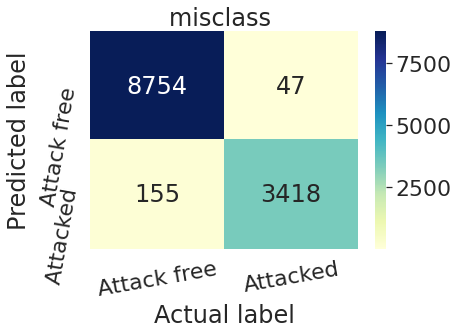

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
from pylab import savefig
import matplotlib.pyplot as plt
%matplotlib inline




cm_matrix = pd.DataFrame(data=cf, columns=['Attack free', 'Attacked'], 
                                 index=['   Attack free ', ' Attacked'])
sns.set(font_scale=2)
sns.heatmap(cm_matrix, annot=True, fmt= 'd', cmap='YlGnBu')
# plt.title("Confusion Matrix for All attack")
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.title("misclass ")
plt.yticks(rotation = 80)
plt.xticks(rotation = 10)
plt.rcParams['font.size'] = 4
plt.rcParams['figure.figsize'] = (1, 1)   
plt.savefig('confusion_mixed_25.pdf', bbox_inches = "tight")
plt.savefig('confusion_mixed_25.PNG', bbox_inches = "tight")
plt.savefig('confusion_mixed_25.svg', bbox_inches = "tight")

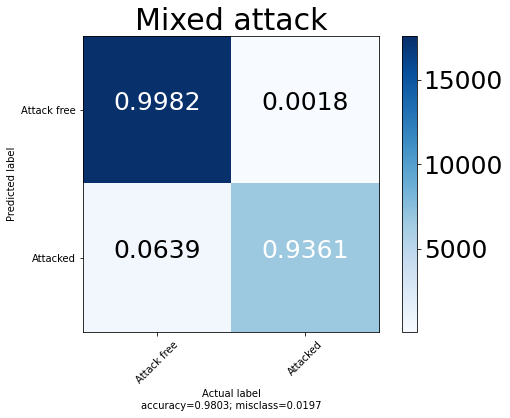

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Mixed attack',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.rcParams['font.size'] = 25
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('Actual label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.grid(False)
    # plt.savefig("mixed_500.pdf",bbox_inches = "tight")
    # plt.savefig("mixed_500.svg",bbox_inches = "tight")
    # plt.savefig("mixed_500.png",bbox_inches = "tight")
    plt.show()

plot_confusion_matrix(cf,["Attack free","Attacked"])

In [ ]:
from numpy import random

x = random.rand(5, 2)
print(x)

log = x[np.arange(5),[0,1,1,0,1]]
print(np.arange(5))
print(log)

[[0.86051149 0.47376015]
 [0.79957864 0.58061976]
 [0.77309014 0.33267299]
 [0.83141662 0.27457232]
 [0.54609881 0.21400711]]
[0 1 2 3 4]
[0.86051149 0.58061976 0.33267299 0.83141662 0.21400711]


In [ ]:
#for getting weightlIst



for i in range(len(weightList)):
  file_=open("weight"+str(i)+".txt",'w')
  for j in range(len(weightList[i])):
    #print(len(weightList[i][j]))
    for k in range(len(weightList[i][j])):
      file_.write(str(weightList[i][j][k]))
      if k<len(weightList[i][j]) -1:
        file_.write("\t")
    file_.write("\n")
  file_.close()



# for i in range(len(biasList)):
#   file_=open("bias"+str(i)+".txt",'w')
#   for j in range(len(biasList[i])):
#       file_.write(str(biasList[i][j])+"\n")
#   file_.close()

In [ ]:
from tqdm import trange
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    #assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        #print(len(targets[excerpt]))
        yield inputs[excerpt], targets[excerpt]

train_log = []
val_log = []
for epoch in range(1):
 
    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        train(network,x_batch,y_batch)

    
    train_log.append(np.mean(predict(network,X_train)==y_train))
    val_log.append(np.mean(predict(network,X_val)==y_val))
    
    #clear_output()
print("Epoch",epoch)
print("Train accuracy:",train_log[-1])
print("Val accuracy:",val_log[-1])
print(100*np.sum(predict(network,X_test)==y_test)/len(y_test))

In [ ]:
from zipfile import ZipFile


def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.
    # we reserve the last 10000 training examples for validation
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]
    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])
    return X_train, y_train, X_val, y_val, X_test, y_test
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(flatten=True)

file_write=open("data.txt",'w')

print(len(X_train[0]))

for i in range(10000):
  file_write.write(str(y_test[i])+"\t")
  for j in range(784):
    file_write.write(str(X_test[i][j])+"\t")
  file_write.write("\n")



file_write.close()






784


In [ ]:
x = np.ones((3,4))
y = [x,x,x,x,x,x]
print(x)
print(y)
l = [x] + y

print("hsdfjsdhfj")
for i in range(len(l)):
  print()

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[1, 2, 3, 45, 6, 78, 8]
hsdfjsdhfj
8
78


In [ ]:
import numpy as np

x = np.ones((3,3))
y = np.ones((3,3))

print(x*y)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [ ]:
np.sum([[0, 1], [0, 5],[2,3]], axis=-1)

array([1, 5, 5])